In [2]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64

In [3]:
headers = {"Content-Type": "application/json"}

data = { 
    "real": "-0.5", 
    "imag": "0.", 
    "size": "2." ,
}

r = requests.post("http://127.0.0.1:3000/mandelbrot", headers=headers, json=data)

# curl -i -X POST http://127.0.0.1:3000/mandelbrot \
#     -H 'Content-Type: application/json' \
#     --data-binary @- << EOF
# { 
#     "real": "-0.5", 
#     "imag": "0.", 
#     "size": "2." 
# }

print(r)

<Response [200]>


In [15]:


incoming_data = r.json()["data"] # This comes in as a string
converted_data = bytes(incoming_data, "utf-8")
#io.BytesIO()
#png.decode("base64")
image = Image.open(io.BytesIO(converted_data))
image.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1098c5710>

Data: <class 'str'> iVBORw0KGgoAAAANSUhEUgAAA


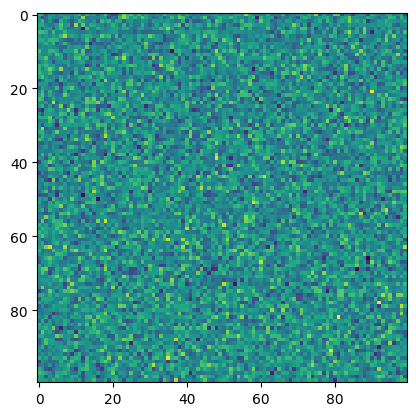

In [38]:
np.random.seed(10)

image = np.random.randn(100, 100)

plt.imshow(image)
buffer = io.BytesIO()
plt.savefig(buffer, format="png") # Place the png as a binary in memory
data = buffer.getvalue()
data = base64.b64encode(data)
data = data.decode()
print('Data:', type(data), data[:25])

In [39]:
file = 'test.html'
with open(file, 'w') as f:
    print("Writing to file:", file)
    f.write(f"<html><body><img src='data:image/png;base64,{data}'></body></html>")

Writing to file: test.html
